In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
company_data=pd.read_csv("Company_Data.csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Initial investigation

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Inference 
* Number of features and records in the given data set is 11 and 400 respesctively

* There is no null values in the data set

* The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

### Data preparation

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
company_data['ShelveLoc']=le.fit_transform(company_data['ShelveLoc'])
company_data['Urban']=le.fit_transform(company_data['Urban'])
company_data['US']=le.fit_transform(company_data['US'])
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

#### Converting sales to category of high,medium and low sales

In [10]:
company_data.insert(11,'sales_category','')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [11]:
for i in range(0,len(company_data['Sales']),1):
    if company_data['Sales'][i]>=11.0:
        company_data["sales_category"][i]='high'
    elif company_data['Sales'][i]<=6.0:
        company_data['sales_category'][i]='Low'
    else:
        company_data['sales_category'][i]='Medium'

In [12]:
company_data['sales_category'].nunique()

3

In [13]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


### Model building

In [14]:
x=company_data.iloc[:,1:11]
y=company_data.iloc[:,11:12]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Model training before selecting important feature

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [17]:
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Low       0.75      0.41      0.53        29
      Medium       0.67      0.89      0.76        45
        high       0.75      0.50      0.60         6

    accuracy                           0.69        80
   macro avg       0.72      0.60      0.63        80
weighted avg       0.70      0.69      0.67        80



In [20]:
print(accuracy_score(y_test,y_pred))

0.6875


In [21]:
confusion_matrix_data=confusion_matrix(y_test,y_pred)
confusion_matrix_data

array([[12, 17,  0],
       [ 4, 40,  1],
       [ 0,  3,  3]], dtype=int64)

<AxesSubplot:>

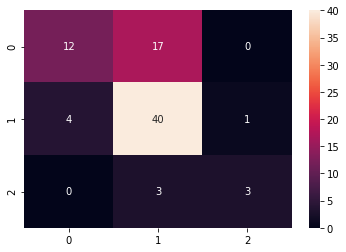

In [22]:
sns.heatmap(confusion_matrix_data,annot=True)

#### Hyperparameter tweaking by using GridsearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators':[20,30,20,100,150]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 30}
0.709375


In [59]:
rf_model_cv=RandomForestClassifier(max_depth=8,min_samples_leaf=2,criterion='entropy',n_estimators=30)
rf_model_cv.fit(x_train,y_train)
y_pred=rf_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.625


#### Feature importance plot

In [60]:
feature_rf=x_train.columns
len(feature_rf)

10

In [61]:
imp_feature_rf=rf_model.feature_importances_
len(imp_feature_rf)

10

In [62]:
data_rf=pd.DataFrame({'feature':feature_rf,'imp_feature':imp_feature_rf})
data_rf=data_rf.sort_values('imp_feature')

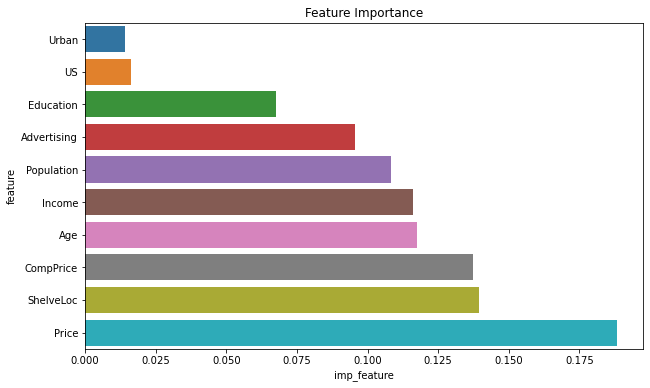

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rf)
plt.show()

### Inference 
* The plot clearly shows that some of the features donot contribute much for model building

* Hence the accuracy can be imporved by droping those insignificant features

### Feature selection by feature importance for Decision tree

In [64]:
from sklearn.feature_selection import SelectFromModel 

In [65]:
selector=SelectFromModel(estimator=RandomForestClassifier())
selector.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [66]:
selector.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False])

In [67]:
len(x_train.columns)

10

In [68]:
feature=x_train.columns[selector.get_support()]

In [69]:
len(x_train.columns[selector.get_support()])

6

### Inference 
* Out of 10 features only 5 features is selscted for building models

In [70]:
x_train_rf=selector.transform(x_train)
x_test_rf=selector.transform(x_test)

In [71]:
rf_model_imp=RandomForestClassifier().fit(x_train_rf,y_train)
y_pred_imp=rf_model_imp.predict(x_test_rf)

In [72]:
print(accuracy_score(y_test,y_pred_imp))

0.675


In [73]:
print(confusion_matrix(y_test,y_pred_imp))

[[15 14  0]
 [ 6 37  2]
 [ 0  4  2]]


In [74]:
print(classification_report(y_test,y_pred_imp))

              precision    recall  f1-score   support

         Low       0.71      0.52      0.60        29
      Medium       0.67      0.82      0.74        45
        high       0.50      0.33      0.40         6

    accuracy                           0.68        80
   macro avg       0.63      0.56      0.58        80
weighted avg       0.67      0.68      0.66        80



In [75]:
imp_feature=rf_model_imp.feature_importances_
imp_feature

array([0.17008902, 0.14877496, 0.14627138, 0.23266958, 0.15335051,
       0.14884454])

In [76]:
data_imp=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_imp=data_imp.sort_values('imp_feature')

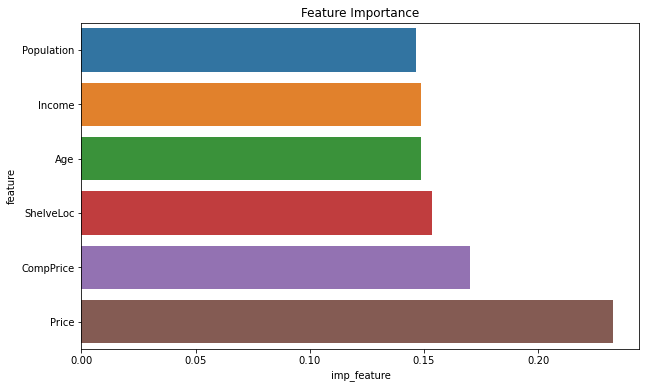

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_imp)
plt.show()

#### Recursive feature elimination

In [78]:
from sklearn.feature_selection import RFE

In [79]:
selector_rfe=RFE(RandomForestClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier())

In [80]:
selector_rfe.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [81]:
feature_rfe=x_train.columns[selector_rfe.get_support()]
feature_rfe

Index(['CompPrice', 'Income', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [82]:
len(x_train.columns[selector_rfe.get_support()])

5

### Inference 
* Here 5 out of 10 feature is selected as an important feature

In [83]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [84]:
rf_model_rfe=RandomForestClassifier().fit(x_train_rfe,y_train)

In [85]:
y_pred_rfe=rf_model_rfe.predict(x_test_rfe)

In [86]:
print(accuracy_score(y_test,y_pred_rfe))

0.65


In [87]:
print(confusion_matrix(y_test,y_pred_rfe))

[[16 13  0]
 [ 7 34  4]
 [ 0  4  2]]


In [88]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

         Low       0.70      0.55      0.62        29
      Medium       0.67      0.76      0.71        45
        high       0.33      0.33      0.33         6

    accuracy                           0.65        80
   macro avg       0.57      0.55      0.55        80
weighted avg       0.65      0.65      0.65        80



In [89]:
imp_feature_rfe=rf_model_rfe.feature_importances_

In [90]:
data_rfe=pd.DataFrame({'feature':feature_rfe,'imp_feature':imp_feature_rfe})
data_rfe=data_rfe.sort_values('imp_feature')

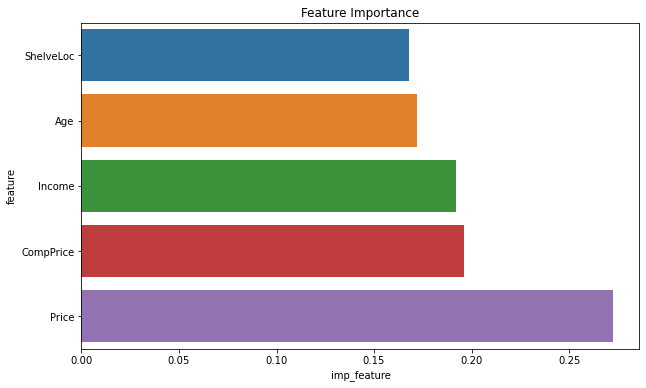

In [91]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rfe)
plt.show()

### Inference

* Price is the feature which affect/contibute more for the sales

* Competerior price fallows price which affect the most